In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
rawdata = pd.read_excel('C:/Users/sreej/OneDrive/Desktop/IAS/Training_Dataset.xlsx')

C:\Users\sreej\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
rawdata.head()

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Playing with Children,Job Searching,Shopping,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,0,0,0,40,180,120,0,0,0,24.000000
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,20,0,120,40,15,15,0,0,0,21.583333
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,0,0,15,85,214,199,0,0,0,17.733333
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,0,0,105,30,240,240,0,0,0,26.833333
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,0,0,0,35,600,40,0,0,0,23.750000


In [4]:
rawdata1 = rawdata

In [19]:
rawdata1.loc[(rawdata1['Employment Status'] == 'Unemployed'),'EmpStatus'] = '0'
rawdata1.loc[(rawdata1['Employment Status'] == 'Employed'),'EmpStatus'] = '1'
rawdata1.loc[(rawdata1['Employment Status'] == 'Not in labor force'),'EmpStatus'] = '2'
rawdata1.loc[(rawdata1['Gender'] == 'Male'),'Gen'] = '0'
rawdata1.loc[(rawdata1['Gender'] == 'Female'),'Gen'] = '1'
rawdata1.loc[(rawdata1['Education Level'] == '10th grade'),'Ed_level'] = '0'
rawdata1.loc[(rawdata1['Education Level'] == '9th grade'),'Ed_level'] = '0'
rawdata1.loc[(rawdata1['Education Level'] == '11th grade'),'Ed_level'] = '0'
rawdata1.loc[(rawdata1['Education Level'] == '12th grade'),'Ed_level'] = '0'
rawdata1.loc[(rawdata1['Education Level'] == 'High School'),'Ed_level'] = '0'
rawdata1.loc[(rawdata1['Education Level'] == 'Associate Degree'),'Ed_level'] = '1'
rawdata1.loc[(rawdata1['Education Level'] == 'Some College'),'Ed_level'] = '1'
rawdata1.loc[(rawdata1['Education Level'] == 'Bachelor'),'Ed_level'] = '2'
rawdata1.loc[(rawdata1['Education Level'] == 'Master'),'Ed_level'] = '3'
rawdata1.loc[(rawdata1['Education Level'] == 'Prof. Degree'),'Ed_level'] = '3'
rawdata1.loc[(rawdata1['Education Level'] == 'Doctoral Degree'),'Ed_level'] = '3'
rawdata1

,Id,Education Level,Age,Age Range,Employment Status,Gender,Children,Weekly Earnings,Year,Weekly Hours Worked,...,Eating and Drinking,Socializing & Relaxing,Television,Golfing,Running,Volunteering,Total,EmpStatus,Gen,Ed_level
0,1,High School,51,50-59,Unemployed,Female,0,0,2005,0,...,40,180,120,0,0,0,24.000000,0,1,0
1,2,Bachelor,42,40-49,Employed,Female,2,1480,2005,40,...,40,15,15,0,0,0,21.583333,1,1,2
2,3,Master,47,40-49,Employed,Male,0,904,2005,40,...,85,214,199,0,0,0,17.733333,1,0,3
3,4,Some College,21,20-29,Employed,Female,0,320,2005,40,...,30,240,240,0,0,0,26.833333,1,1,1
4,5,High School,49,40-49,Not in labor force,Female,0,0,2005,0,...,35,600,40,0,0,0,23.750000,2,1,0
5,6,High School,44,40-49,Not in labor force,Male,1,0,2005,0,...,15,596,84,0,0,0,25.083333,2,0,0
6,7,High School,46,40-49,Employed,Male,0,700,2005,40,...,60,165,150,0,0,0,14.000000,1,0,0
7,8,Bachelor,24,20-29,Employed,Female,0,442,2005,45,...,0,0,0,0,0,0,8.250000,1,1,2
8,9,Some College,30,30-39,Not in labor force,Female,2,0,2005,0,...,90,225,90,0,0,0,19.500000,2,1,1
9,10,Some College,26,20-29,Employed,Male,0,378,2005,60,...,140,15,15,0,0,0,16.333333,1,0,1


In [20]:
raw_data = rawdata1.loc[rawdata['Weekly Earnings'] == 0 ]
raw_data = rawdata1.loc[rawdata['Weekly Hours Worked'] == 0 ]

In [21]:
rawdatasa=raw_data.sample(n=5000, random_state=2)
Y = np.array(rawdatasa['EmpStatus'])
Y

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

In [29]:
X = rawdatasa.drop(['Employment Status','Gender','Year','Age Range','Education Level','Id','Total','EmpStatus','Ed_level','Weekly Hours Worked','Weekly Earnings'], axis = 1)

In [30]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, train_Y);

In [32]:
 rf.feature_importances_

array([ 0.17101312,  0.04224681,  0.10797546,  0.07383848,  0.05171233,
        0.06352057,  0.0348313 ,  0.00983141,  0.04520619,  0.05448107,
        0.09021787,  0.12133766,  0.09133995,  0.00158383,  0.0022341 ,
        0.01482532,  0.02380452])

In [33]:
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, 
                          columns=["Importance"])

C:\Users\sreej\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


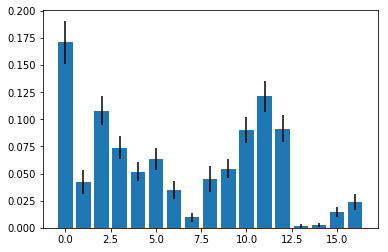

In [34]:
import matplotlib.pyplot as plt
importance["Std"] = np.std([tree.feature_importances_
                            for tree in rf.estimators_], axis=0)
indices = np.argsort(importance)[::-1]

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

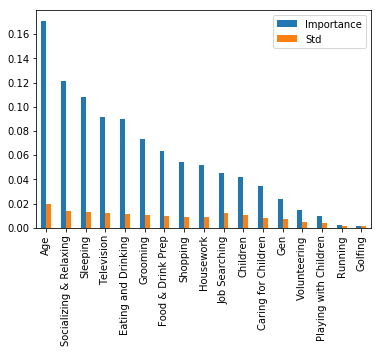

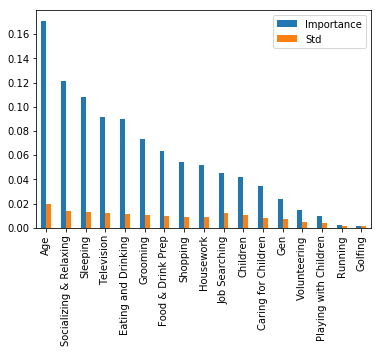

In [45]:
importance.sort_values(by='Importance', ascending=False).plot(kind = 'bar')
plt.show()

In [36]:
predictions = rf.predict(test_X)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_Y,predictions))

             precision    recall  f1-score   support

          0       0.57      0.16      0.25       159
          1       0.53      0.10      0.16       104
          2       0.81      0.98      0.89       987

avg / total       0.76      0.80      0.75      1250



In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(test_Y,predictions)
print(r2)

-0.149727680221


In [46]:
predictions

array(['2', '2', '2', ..., '2', '2', '2'], dtype=object)

In [47]:
test_Y

array(['2', '2', '2', ..., '1', '2', '2'], dtype=object)